# Лабораторная по гиперболическим уравнениям

Мой шаблон - прямоугольник:

(U k+1 m−1   − U k m-1  +  U k+1 m  − U k m)/2τ+c(U k+1 m −U k+1 m−1  +  U k m  −  U k m−1)/2h= F k+1/2 m+1/2,

In [94]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Заполняю начальными значениями матрицу :

In [250]:
c=0.9
def F(t, x):
    return t*x**(3)-3

def fi(x):
    return (x**3) / (16* (c**2))
def ksi(t):
    return c * (t**3) / 16

t_max = 2
N=200
tau = t_max/N
x_max = 2
h = x_max/N

In [251]:
N_t = int(t_max / tau + 1)
N_x = int(x_max / h + 1)

matr = np.zeros([N_t, N_x])
for m in range(0, N_x):
    matr[0, m] = fi(h * m)
for k in range(0, N_t):
    matr[k, 0] = ksi(tau * k)

for m in range(1, N_x):
    for k in range(1, N_t):
        matr[k, m] = 0

Произвожу расчет значений :

In [252]:
for m in range(1, N_x):
    for k in range(1, N_t):
        matr[k, m] = (2*h*tau/(h + c * tau)) * (F((k-1/2)*tau, (m-1/2)*h)  - (matr[k, m-1] - matr[k-1, m-1] - matr[k-1, m]) / (2*tau)- c * (-matr[k, m-1] + matr[k-1, m] - matr[k-1, m-1]) / (2*h) )

Text(0.5, 0.92, 'THE RESULT')

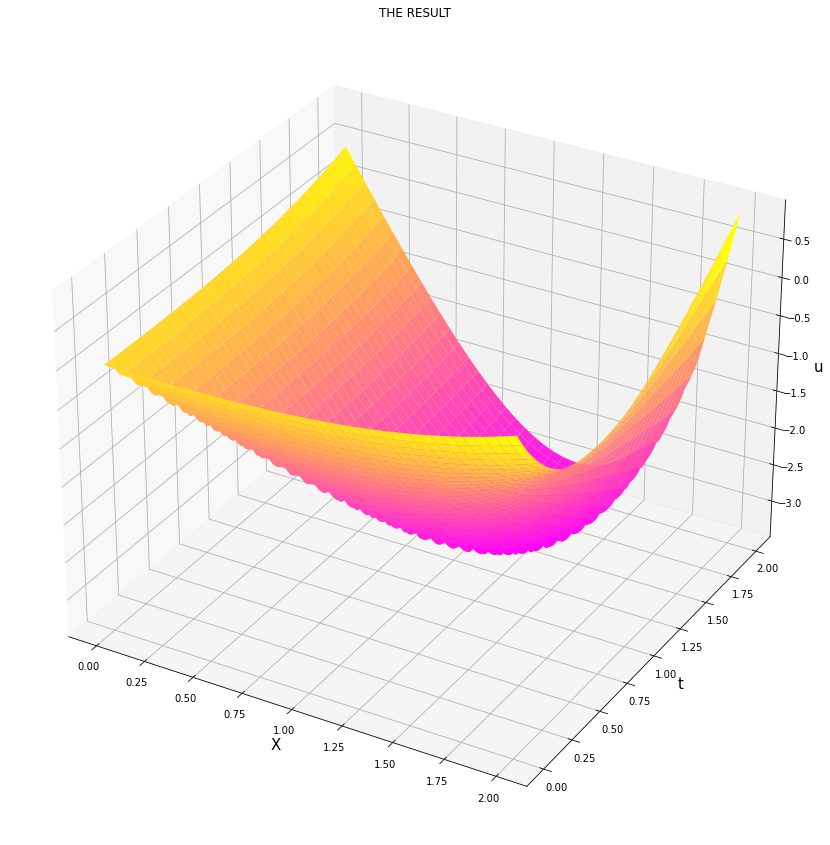

In [253]:
X = np.arange(0, x_max + h / 2, h)
Y = np.arange(0, t_max + tau / 2, tau)
X, Y = np.meshgrid(X, Y)

hf = plt.figure(figsize=[15, 15])
ax = hf.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('t', fontsize=15)
ax.set_zlabel('u', fontsize=15)

ax.plot_surface(X, Y, matr, cmap='spring', linewidths=0.2);
plt.title("THE RESULT")

Все :)

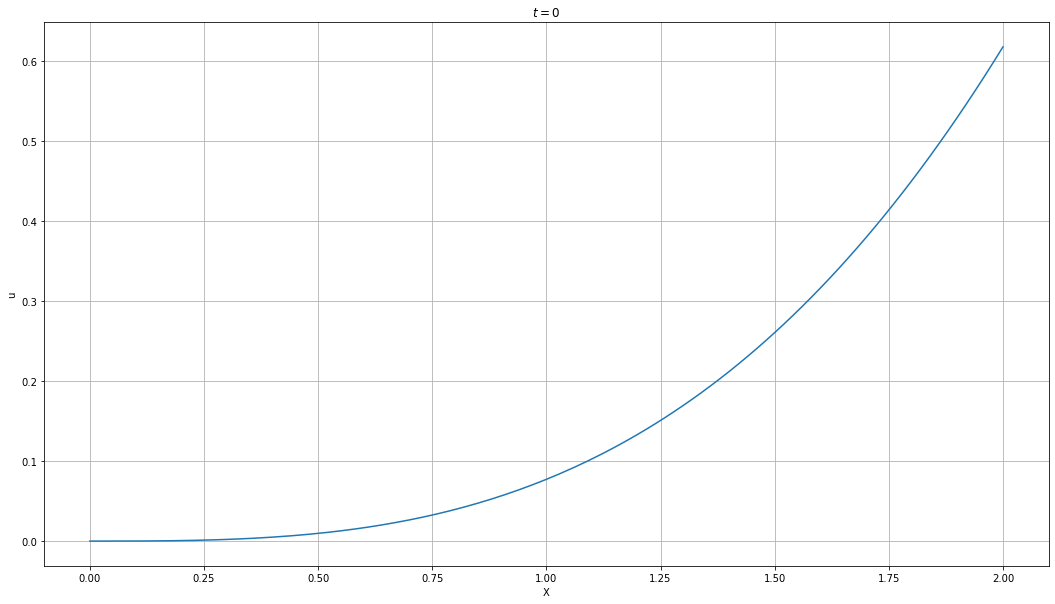

In [254]:

plt.figure(figsize=[18,10 ])
plt.grid()
plt.title("$t=0$")
plt.ylabel('u')
plt.xlabel('X')
plt.plot(X[0], matr[0])
plt.show()

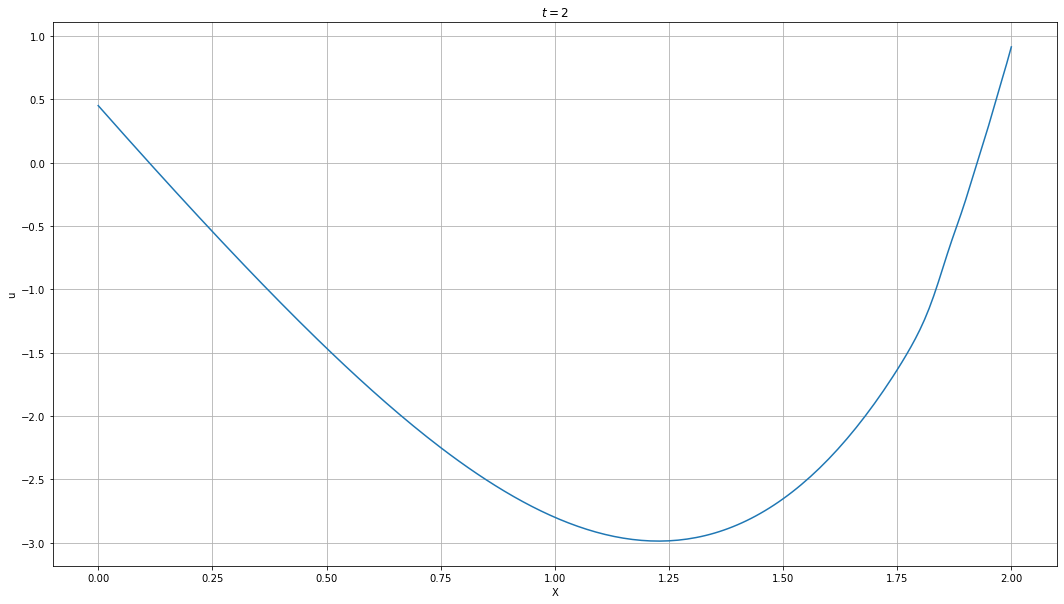

In [255]:
plt.figure(figsize=[18,10 ])
plt.grid()
plt.title("$t=2$")
plt.ylabel('u')
plt.xlabel('X')
plt.plot(X[200], matr[200])
plt.show()

In [256]:
def variants(N):
    t_max = 2
    tau = t_max/200
    x_max = 2
    h = x_max/N
    N_t = int(t_max / tau + 1)
    N_x = int(x_max / h + 1)

    matr = np.zeros([N_t, N_x])
    for m in range(0, N_x):
        matr[0, m] = fi(h * m)
    for k in range(0, N_t):
        matr[k, 0] = ksi(tau * k)

    for m in range(1, N_x):
        for k in range(1, N_t):
            matr[k, m] = 0
    for m in range(1, N_x):
        for k in range(1, N_t):
            matr[k, m] = (2*h*tau/(h + c * tau)) * (F((k-1/2)*tau, (m-1/2)*h)  - (matr[k, m-1] - matr[k-1, m-1] - matr[k-1, m]) / (2*tau)- c * (-matr[k, m-1] + matr[k-1, m] - matr[k-1, m-1]) / (2*h) )  
    X = np.arange(0, x_max + h / 2, h)
    Y = np.arange(0, t_max + tau / 2, tau)
    X, Y = np.meshgrid(X, Y)

    hf = plt.figure(figsize=[15, 15])
    ax = hf.add_subplot(111, projection='3d')
    ax.set_xlabel('X', fontsize=15)
    ax.set_ylabel('t', fontsize=15)
    ax.set_zlabel('u', fontsize=15)

    ax.plot_surface(X, Y, matr, cmap='spring', linewidths=0.2);
  
    print ( 'H = ' ,h )
    print('The Courant Number is' ,0.9 * tau / h )

H =  0.4
The Courant Number is 0.022500000000000003


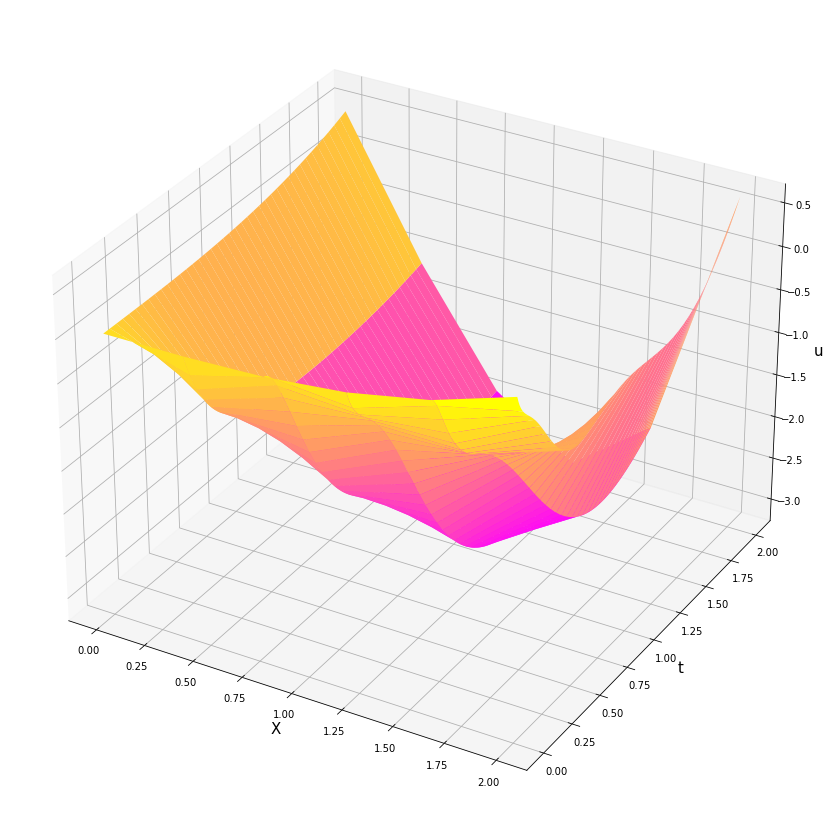

In [257]:
variants(5)

H =  0.2
The Courant Number is 0.045000000000000005


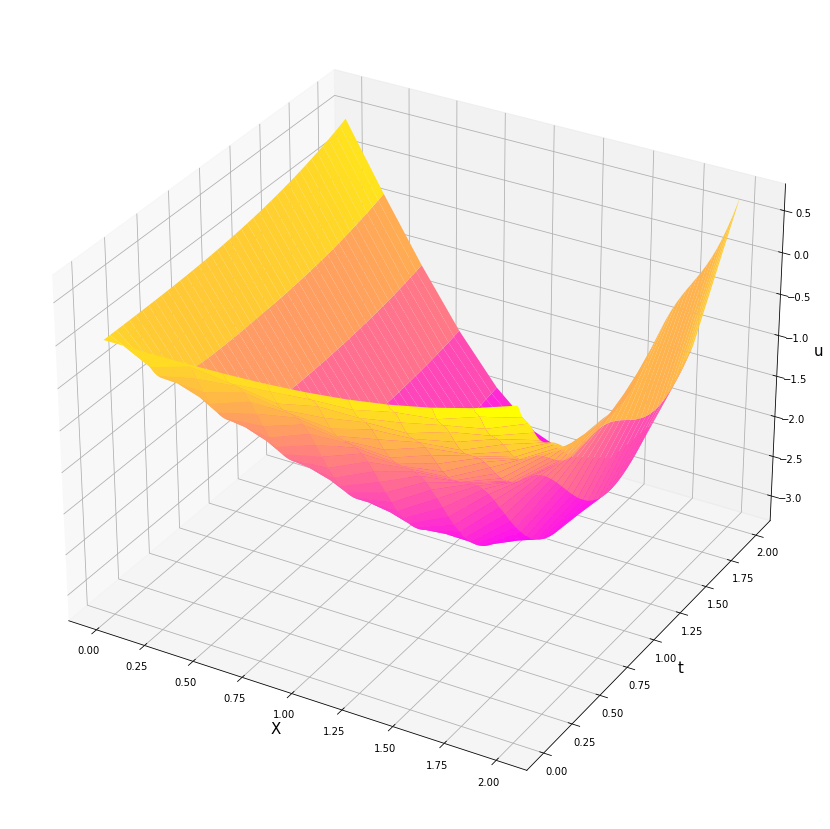

In [258]:
variants(10)



H =  0.04
The Courant Number is 0.22500000000000003


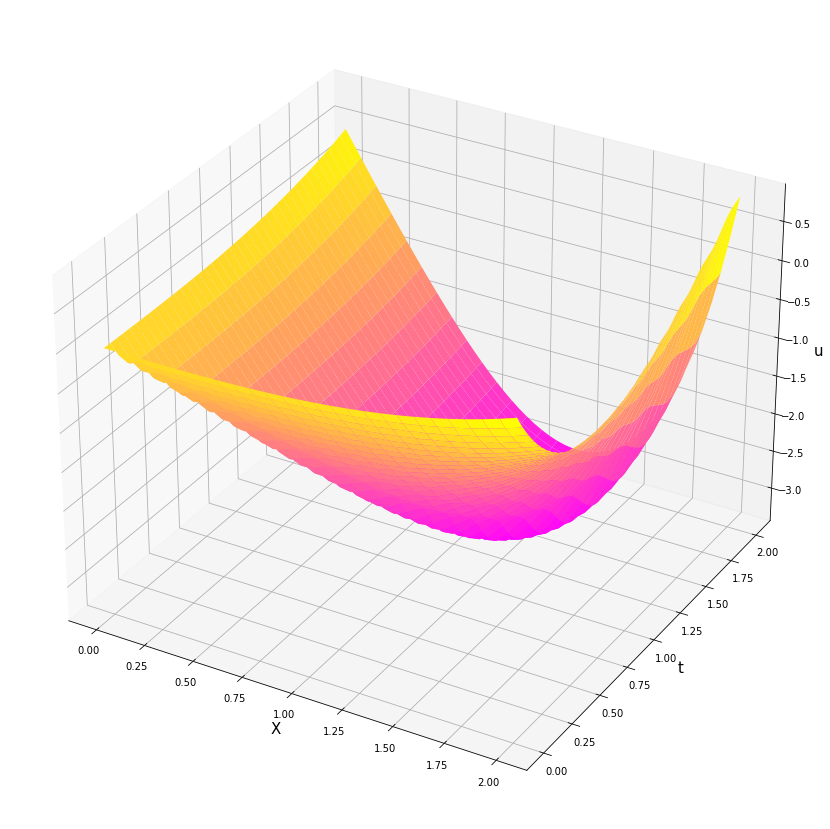

In [259]:
variants(50)

H =  0.008
The Courant Number is 1.125


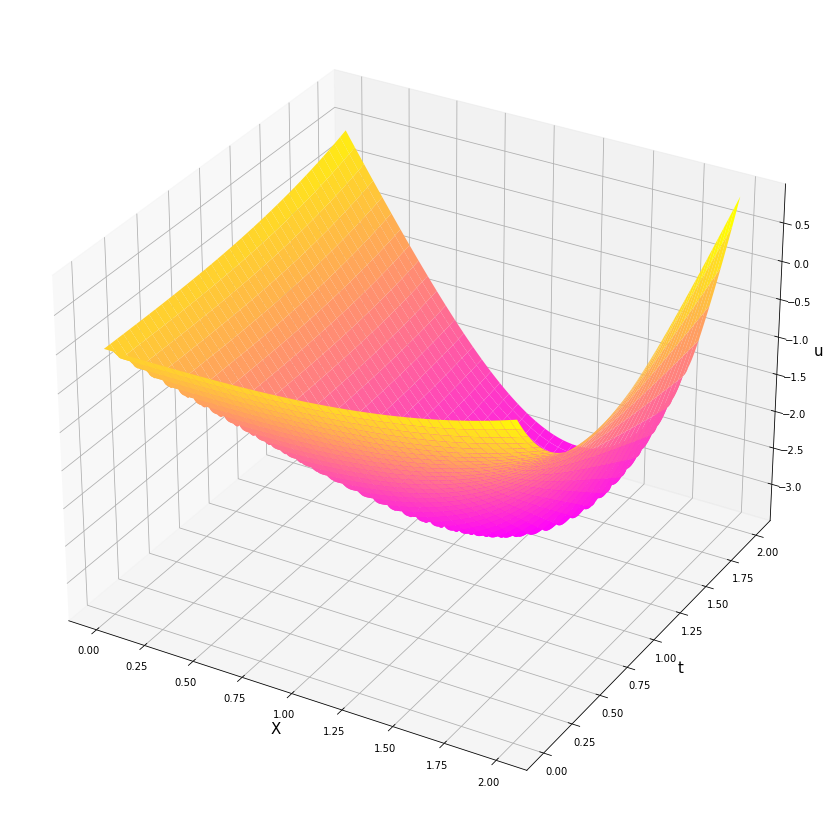

In [260]:
variants(250)

H =  0.002857142857142857
The Courant Number is 3.1500000000000004


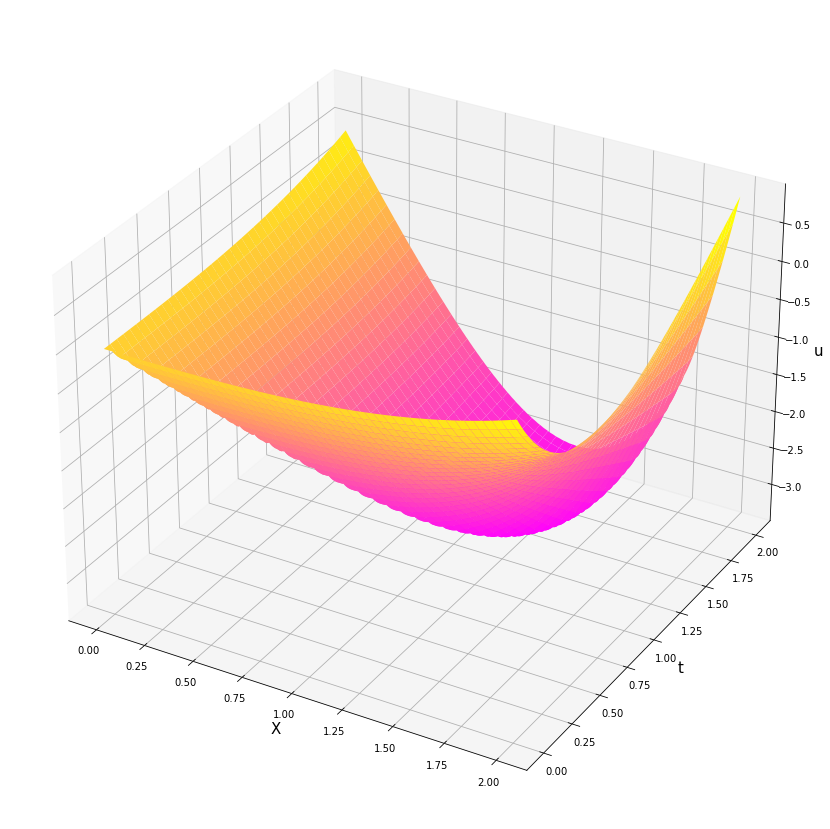

In [261]:
variants(700)